In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from experiment_mnist import *
from tfshow import *

/home/sergei/miniconda3/envs/ML/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


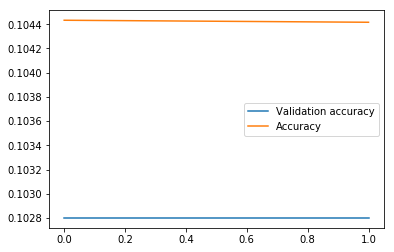

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


In [2]:
K.clear_session()
experiment = MNISTExperiment([10, 10], 0.1, 1, epochs = 2, activation = 'sigmoid', reg_type = 'delta',
                             reg_coeff = 0.1, do_print = True)

In [3]:
# Look inside dense_3 gray component, will see the Delta (Erf) regularizer
# Look inside training->SGD->gradients->dense_(123) to see the regularizer gradient (abs, sum, max)
show_graph(tf.get_default_graph())